# 1 - Introduction

Name : Huesca Rashad Nadiputra

Batch : FTDS-016-RMT

Dataset : Query of Credit Card Default from Bigquery Public Data

Objective : Make a Classification model to predict default payment next month.

In order to predict wether a person may default their payment or not, we can analyze the obvious stats like their repayment record, but we could also analyze the person's background, like their salaries, education level, number of childs and many more. We will explore some of these data in our EDA with some assumptions.

Problem descriptions.
- Find out whether the user with higher education level tend to not default their payments!
- How many of our user have bills that breach their balance limit?
- Are there any user that haven't payed their bills for more than 3 months?
- Find out whether the user with higher limit on their credit balance tend to not default their payment!
- What is the proportion of our user that default their payment in the last month? 

Query was made using this code:
```
SELECT
  limit_balance,
  sex,
  education_level,
  marital_status,
  age,
  pay_0,
  pay_2,
  pay_3,
  pay_4,
  pay_5,
  pay_6,
  bill_amt_1,
  bill_amt_2,
  bill_amt_3,
  bill_amt_4,
  bill_amt_5,
  bill_amt_6,
  pay_amt_1,
  pay_amt_2,
  pay_amt_3,
  pay_amt_4,
  pay_amt_5,
  pay_amt_6,
  default_payment_next_month
FROM
  `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT
  31952
  ```

# 2 - Import Libraries

We will use the following libraries for this task.

In [139]:
# Import Libraries

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
import json

# 3 - Data Loading

First we are going to load the dataset that we will use using pd.read_csv.

In [38]:
# Load Dataset

raw = pd.read_csv('h8dsft_P1M1_huesca_rashad.csv')
raw

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


Before we do anything else to our dataset, it is better that we duplicate it first.

In [39]:
# Duplicate Dataset

df = raw.copy()

We can see the top and bottom datas of this dataset using .head and .tail.

In [40]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0


In [41]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
2964,100000.0,2,1,2,28.0,0.0,0.0,0.0,2.0,0,...,10775.0,10998.0,12655.0,1300.0,3005.0,0.0,700.0,2000.0,1500.0,0


We will rename some of the columns according to the info we have from the BigQuery so we could better understand the values.

In [42]:
df.rename(columns={'pay_0':'status_sep','pay_2':'status_aug','pay_3':'status_jul','pay_4':'status_jun','pay_5':'status_may','pay_6': 'status_apr', 
    'bill_amt_1':'bill_sep', 'bill_amt_2':'bill_aug', 'bill_amt_3':'bill_jul', 'bill_amt_4':'bill_jun', 'bill_amt_5':'bill_may', 'bill_amt_6':'bill_apr', 
    'pay_amt_1':'paid_sep', 'pay_amt_2':'paid_aug', 'pay_amt_3':'paid_jul', 'pay_amt_4':'paid_jun', 'pay_amt_5':'paid_may', 'pay_amt_6':'paid_apr',
    'default_payment_next_month':'default_oct'}, inplace=True)
df

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


We can also check a quick summary of our dataset using .info().

In [43]:
# Check Dataset - 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2965 non-null   float64
 1   sex              2965 non-null   int64  
 2   education_level  2965 non-null   int64  
 3   marital_status   2965 non-null   int64  
 4   age              2965 non-null   float64
 5   status_sep       2965 non-null   float64
 6   status_aug       2965 non-null   float64
 7   status_jul       2965 non-null   float64
 8   status_jun       2965 non-null   float64
 9   status_may       2965 non-null   int64  
 10  status_apr       2965 non-null   int64  
 11  bill_sep         2965 non-null   float64
 12  bill_aug         2965 non-null   float64
 13  bill_jul         2965 non-null   float64
 14  bill_jun         2965 non-null   float64
 15  bill_may         2965 non-null   float64
 16  bill_apr         2965 non-null   float64
 17  paid_sep      

From the information we can see that there are no null-values in our dataset, and all datatypes are correct.

We could also use .describe() to check our dataset further.

In [44]:
# Check Dataset - 2

df.describe()

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


We can see that there are some negative values in the status and bill features, we will explore this further in EDA.

# 4 - Exploratory Data Analysis (EDA)

In [45]:
df

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


Now we will do more exploration about all the feature and target of our datasets.

## Personal Related Features

First there are personal related features which include sex, education_level, marital_status, and age.

We will create a function to visualize the features.

In [46]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts")
    print(df1)
    fig1.show()

In [47]:
plot_bar('sex')

   sex  counts
0    1    1163
1    2    1802


This feature contained information about gender with 1 as male, and 2 as female. We can see that there are more female than male in this dataset.

In [48]:
plot_bar('education_level')

   education_level  counts
0                0       2
1                1    1039
2                2    1400
3                3     483
4                4      13
5                5      24
6                6       4


This feature contained information about education level with the following details:(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). We can see that there are 0 valued data here, which shouldn't exist, because that there are only 2 of them we will remove it immediately.

In [49]:
df = df[df['education_level']!=0]
df

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


Let's see the relationship between education level and our target.

<AxesSubplot: xlabel='education_level', ylabel='count'>

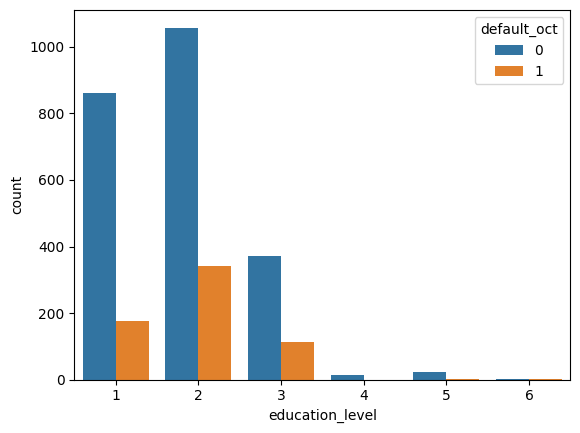

In [50]:
sns.countplot(x ='education_level', data = df, hue='default_oct')

We can't really see any significant indication that the higher educated user less likely to default payment or not, because we only have little data for low educated category like 3, 4, 5, and 6. We will investigate the correlation with more details on feature selection.

In [51]:
plot_bar('marital_status')

   marital_status  counts
0               0       4
1               1    1331
2               2    1593
3               3      35


This feature contained information about marital status with the following details: (1=married, 2=single, 3=others). Same as the last feature, there are 0 valued data here, and because there are only 4 of them we will also remove them immediately.

In [52]:
df = df[df['marital_status']!=0]
df

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
5,140000.0,2,2,1,34.0,0.0,0.0,0.0,0.0,0,...,140962.0,137819.0,137094.0,7000.0,7000.0,5300.0,5300.0,10100.0,5400.0,0
6,20000.0,2,2,1,49.0,0.0,0.0,0.0,0.0,0,...,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


Next is age, which is a numerical feature, we will create another function to configure the distribution of our feature with this code.

In [53]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    print('\nSkewness Value : ', df[variable].skew())

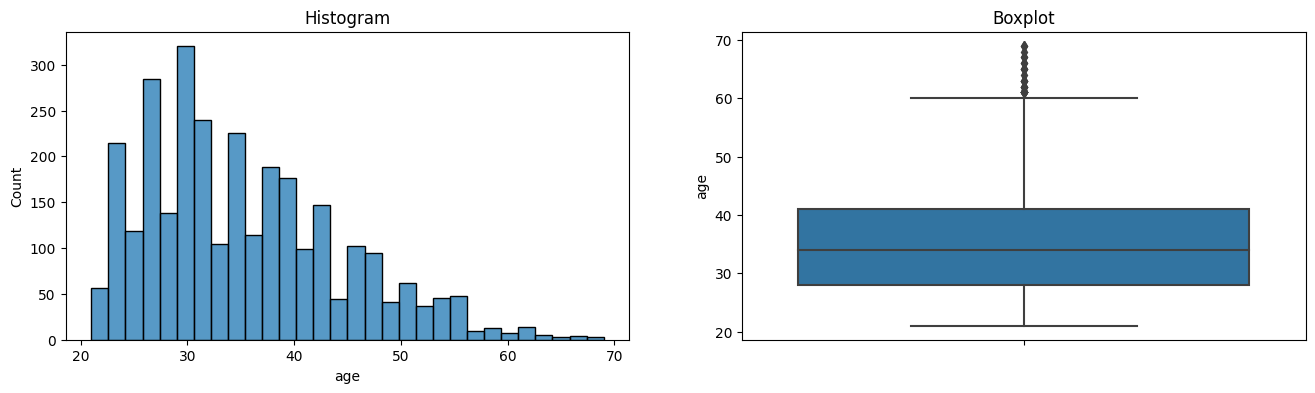


Skewness Value :  0.7746332209744393


In [54]:
diagnostic_plots(df, 'age')

There seems to be some outliers here, we will check them using IQR because this feature have a skewed distribution.

In [55]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [56]:
upper_boundary, lower_boundary = find_skewed_boundaries(df, 'age', 1.5)
upper_boundary, lower_boundary

(60.5, 8.5)

In [57]:
outlier = df[df['age']>upper_boundary]
outlier.sort_values('age')

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
64,510000.0,2,3,1,61.0,0.0,0.0,2.0,0.0,0,...,178179.0,223100.0,216225.0,17000.0,0.0,6508.0,50000.0,7000.0,6000.0,0
78,290000.0,1,3,1,61.0,0.0,0.0,0.0,0.0,0,...,218399.0,200461.0,204637.0,10492.0,12447.0,8973.0,6761.0,6983.0,5980.0,0
107,80000.0,1,2,1,61.0,0.0,0.0,0.0,0.0,0,...,41003.0,29690.0,27596.0,5500.0,10000.0,7003.0,4700.0,3600.0,3500.0,1
2340,70000.0,1,3,3,61.0,3.0,2.0,2.0,0.0,0,...,10828.0,11346.0,11589.0,1200.0,0.0,1482.0,1000.0,426.0,1000.0,0
163,510000.0,2,3,1,61.0,0.0,0.0,0.0,2.0,0,...,181801.0,178179.0,223100.0,8500.0,17000.0,0.0,6508.0,50000.0,7000.0,0
1596,50000.0,2,3,1,61.0,2.0,0.0,0.0,0.0,2,...,6354.0,4908.0,3724.0,1135.0,1055.0,656.0,0.0,133.0,50.0,0
987,10000.0,1,3,2,61.0,0.0,0.0,0.0,0.0,0,...,9774.0,9973.0,9638.0,1293.0,1235.0,1000.0,199.0,193.0,197.0,1
532,20000.0,1,2,1,61.0,3.0,4.0,3.0,2.0,2,...,16893.0,21318.0,20412.0,0.0,0.0,0.0,4726.0,0.0,0.0,1
565,230000.0,1,1,1,61.0,-1.0,-1.0,-1.0,-1.0,-1,...,4932.0,2783.0,7411.0,3710.0,2266.0,7338.0,2791.0,7433.0,4527.0,0
2554,50000.0,1,2,1,61.0,2.0,-1.0,-1.0,-1.0,-1,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,1


We can see that the outliers ranged from 61 to 69 which we can say that this is natural outliers.

## Repayment Status Features

The next set of features are the repayment status features which include all the status feature from September to April.

In [58]:
plot_bar('status_sep')

    status_sep  counts
0         -2.0     245
1         -1.0     540
2          0.0    1513
3          1.0     355
4          2.0     262
5          3.0      29
6          4.0       7
7          5.0       2
8          6.0       1
9          7.0       2
10         8.0       3


Repayment status features contain information with the following details(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above). We can clearly see that there are a number of people who haven't payed their bills for more than three months 15 people to be exact, with 3 of them haven't payed for a shocking 8 months.

We can also see that from the table there are another categories that wasn't included in the information which is -2 and 0, we will check it further to see what cause this.

In [59]:
check = df.copy()
check = check.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
check[check['status_sep']==-2]

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
440,350000.0,-2.0,-2.0,-1.0,0.0,0,-2,16459.0,4120.0,44164.0,35233.0,884.0,9924.0,941.0,44743.0,0.0,884.0,9924.0,10824.0,1
442,460000.0,-2.0,-2.0,-1.0,0.0,0,0,323408.0,261444.0,309622.0,297039.0,258056.0,188083.0,5229.0,580464.0,80017.0,31017.0,27.0,38700.0,0
443,260000.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0
445,200000.0,-2.0,-2.0,-2.0,-1.0,-1,-1,6626.0,2469.0,3760.0,4273.0,3015.0,5076.0,2476.0,3771.0,4285.0,3023.0,5088.0,6282.0,0
446,530000.0,-2.0,-2.0,-2.0,-2.0,-1,0,-30.0,-420.0,390.0,390.0,166210.0,129716.0,0.0,1200.0,390.0,166210.0,6000.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,450000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2547,50000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2876,420000.0,-2.0,-2.0,-1.0,0.0,0,0,0.0,0.0,277510.0,279493.0,285447.0,291183.0,0.0,277510.0,10000.0,10000.0,10000.0,10500.0,0
2877,500000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,11354.0,9983.0,13570.0,10000.0,10000.0,10000.0,9983.0,13587.0,10000.0,10000.0,10000.0,25304.0,0


Let's focus on the row 2546, all the status shown -2, all the bill shown some values, and all the paid also shown the same value or more. From this example we can see that:
- -2 is not a wrong input that supposed to be 2, because the examples shown that the customer always pays the bills.
- -2 is not a month without transactions because there are values in the bills feature.
- -2 is not revolving credits because the bill always paid in full.

If we see the other rows, one of the three if not all of the conclusion also applied, we cannot see any clear indication that the value means anything concrete, let's check how many data we will lose if we drop this value from all the status features.

In [60]:
test = df.copy()
test = test.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
test = test[test['status_sep']!=-2]
test = test[test['status_aug']!=-2]
test = test[test['status_jul']!=-2]
test = test[test['status_jun']!=-2]
test = test[test['status_may']!=-2]
test = test[test['status_apr']!=-2]
test

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
2,130000.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
5,140000.0,0.0,0.0,0.0,0.0,0,0,132541.0,136186.0,139418.0,140962.0,137819.0,137094.0,7000.0,7000.0,5300.0,5300.0,10100.0,5400.0,0
6,20000.0,0.0,0.0,0.0,0.0,0,0,13561.0,14573.0,15290.0,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,80000.0,3.0,2.0,2.0,2.0,3,3,6269.0,7212.0,7246.0,8073.0,8349.0,8420.0,1200.0,300.0,1100.0,700.0,500.0,0.0,1
2961,20000.0,-1.0,-1.0,-1.0,-1.0,-1,-1,628.0,662.0,596.0,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,0.0,0.0,0.0,0.0,0,0,13429.0,14502.0,15564.0,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,0.0,0.0,0.0,0.0,0,0,42856.0,29248.0,17775.0,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


If we drop all the -2 values from the status features, we will lose about 600 rows of data which is a lot, let's see the other obscure value which is 0.

In [61]:
check = df.copy()
check = check.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
check[check['status_sep']==-0]

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
2,130000.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
5,140000.0,0.0,0.0,0.0,0.0,0,0,132541.0,136186.0,139418.0,140962.0,137819.0,137094.0,7000.0,7000.0,5300.0,5300.0,10100.0,5400.0,0
6,20000.0,0.0,0.0,0.0,0.0,0,0,13561.0,14573.0,15290.0,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,50000.0,0.0,0.0,0.0,0.0,0,0,22178.0,21976.0,21697.0,20683.0,19283.0,19965.0,1700.0,1650.0,850.0,700.0,1000.0,1000.0,0
2954,20000.0,0.0,0.0,0.0,0.0,2,2,11043.0,11770.0,13188.0,18318.0,18419.0,18978.0,1200.0,1600.0,5700.0,700.0,1000.0,0.0,1
2962,20000.0,0.0,0.0,0.0,0.0,0,0,13429.0,14502.0,15564.0,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,0.0,0.0,0.0,0.0,0,0,42856.0,29248.0,17775.0,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


We can see that the monthly payment is always below the bills, so we could assume that value 0 means that there are no late monthly bills, but there are still revolving credits.

Let's check other impossibility from this feature, we can say that if the status in August is -1 (which means there are no late bills) it would be impossible for the status in September to be greater than 1 because the maximum months with late bills is only September itself, let's check that on the dataset.

In [62]:
test = df.copy()
test = test.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
test = test[test['status_sep']>1]
test = test[test['status_aug']==-1]
test

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
593,180000.0,2.0,-1.0,-1.0,-1.0,-1,0,326.0,326.0,326.0,480.0,1011.0,2685.0,326.0,326.0,480.0,1011.0,2000.0,3000.0,1
651,340000.0,2.0,-1.0,-1.0,-1.0,-1,-1,411.0,10983.0,8548.0,11190.0,8210.0,7981.0,11038.0,8591.0,11246.0,8251.0,8021.0,0.0,0
704,180000.0,2.0,-1.0,-1.0,-1.0,-1,-1,1343.0,437.0,2297.0,4428.0,985.0,4028.0,438.0,2308.0,4446.0,987.0,4040.0,600.0,1
1381,360000.0,2.0,-1.0,0.0,0.0,0,0,218.0,7022.0,9744.0,89215.0,98256.0,99145.0,7022.0,3001.0,80000.0,10500.0,5000.0,10000.0,0
1406,130000.0,2.0,-1.0,-1.0,-1.0,-1,-1,836.0,668.0,1017.0,1298.0,550.0,-286.0,668.0,1200.0,1300.0,964.0,1698.0,60549.0,1
1408,30000.0,2.0,-1.0,-1.0,-1.0,-1,-1,174.0,1995.0,3530.0,0.0,5960.0,0.0,1995.0,3530.0,0.0,5960.0,0.0,1778.0,0
1456,50000.0,2.0,-1.0,-1.0,-1.0,-1,-1,291.0,291.0,291.0,291.0,291.0,0.0,291.0,291.0,291.0,291.0,0.0,873.0,0
1489,210000.0,2.0,-1.0,-1.0,0.0,-1,-1,1172.0,380.0,1552.0,776.0,776.0,1359.0,380.0,1552.0,0.0,776.0,1359.0,20302.0,0
1521,180000.0,2.0,-1.0,-1.0,-1.0,-1,-1,416.0,416.0,416.0,416.0,150.0,982.0,416.0,416.0,416.0,150.0,982.0,416.0,1
1795,90000.0,2.0,-1.0,2.0,-1.0,0,-1,390.0,780.0,390.0,780.0,390.0,780.0,780.0,0.0,780.0,0.0,780.0,0.0,1


There is actually quite a few data that shown the impossible case, and this is only by checking one variable, what about the other months, there will be numerous case like this.

After exploring and finding some inconsistencies on these feature we can conclude that it will be better if we don't use this feature, after all with personal judgment we can assume that this feature is just the reflection of the bills and payment feature which we will also check whether we can use them or not.

## Bills Features

From our early exploration we found some negative values in the bills feature, we will check those data further.

In [63]:
check = df.copy()
check = check.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
check[check['bill_sep']<0]

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
446,530000.0,-2.0,-2.0,-2.0,-2.0,-1,0,-30.0,-420.0,390.0,390.0,166210.0,129716.0,0.0,1200.0,390.0,166210.0,6000.0,3000.0,0
447,200000.0,1.0,-2.0,-2.0,-1.0,-1,-1,-5.0,-5.0,-5.0,2999.0,4804.0,4402.0,0.0,0.0,3004.0,4804.0,5008.0,169.0,0
455,50000.0,1.0,-2.0,-1.0,-1.0,-1,0,-11545.0,-1935.0,7321.0,2850.0,6340.0,3110.0,10000.0,10000.0,7867.0,6340.0,3000.0,2218.0,0
456,300000.0,1.0,-2.0,-2.0,-2.0,-1,3,-694.0,-694.0,0.0,0.0,694.0,394.0,0.0,694.0,0.0,694.0,0.0,0.0,0
471,200000.0,1.0,-2.0,-1.0,-1.0,-2,-2,-58.0,-58.0,2786.0,0.0,116.0,0.0,0.0,2844.0,0.0,116.0,0.0,0.0,0
476,300000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-3.0,-3.0,-3.0,580.0,992.0,1205.0,0.0,0.0,583.0,992.0,1205.0,96.0,0
489,360000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-2.0,-2.0,-2.0,-2.0,1422.0,0.0,0.0,0.0,0.0,1424.0,0.0,6624.0,0
505,330000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-17.0,-17.0,-17.0,988.0,-12.0,138.0,0.0,0.0,1005.0,12.0,150.0,13.0,0
506,160000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-510.0,-520.0,0.0,-390.0,780.0,0.0,380.0,2000.0,0.0,101170.0,0.0,0.0,0
508,160000.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-20.0,-20.0,3640.0,2935.0,1603.0,14129.0,0.0,3660.0,3135.0,1650.0,14200.0,1500.0,1


There seems to be quite a few negative valued bills in September, not to mention if we check the other months, it will be a significant portion of our dataset, but we can still use this data if we assume that negative bills means that the user overpayed their last month payment, we can assume this by looking an example on row 446:

- July bills = 390.0
- Payment in August = 1200.0
- Overpayment = 1200-390 = 810
- Uses in August (assumption) = 390
- August bills = Uses in August - Overpayment = 390-810 = -420

We can actually now this for sure if we now the monthly uses of our user, but in this dataset those information are not provided, so we can only assume for now.

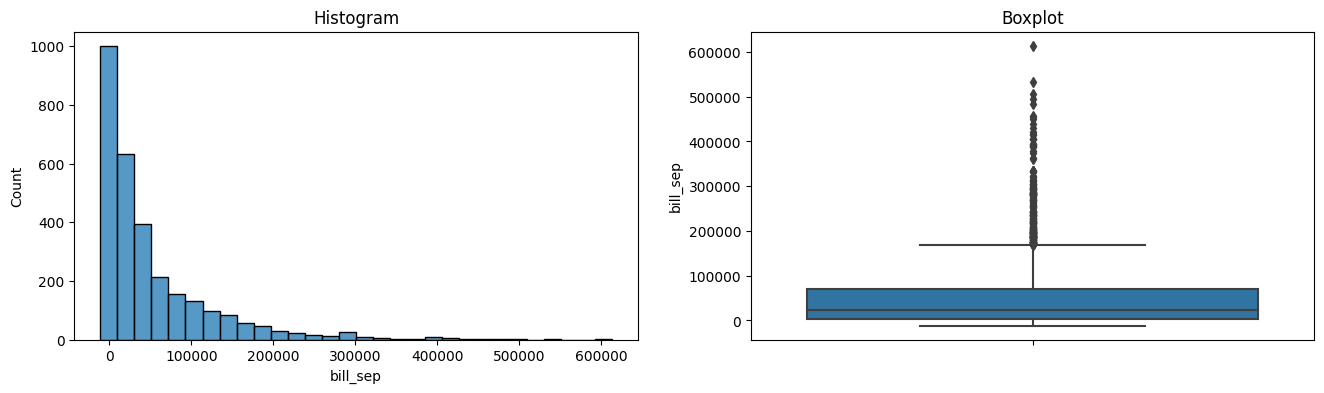


Skewness Value :  2.4824376962403947


In [64]:
diagnostic_plots(df, 'bill_sep')

We can see that the distribution is highly skewed and caused many data to be outliers, this is because the value of most of the bills are very little if not 0 and it is not reccommended to handle the outliers because it may contain valuable data for our model which is the user with high uses of their credit cards.

Next we will find out how many user have bills that breach their balance limit.

In [65]:
check = df.copy()
check = check.drop(['sex', 'education_level', 'marital_status', 'age'], axis=1)
check = check[check['bill_sep']>check['limit_balance']]
check.sort_values('limit_balance', ascending=False)

,limit_balance,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
2601,500000.0,2.0,2.0,2.0,0.0,0,0,533142.0,504834.0,413844.0,305875.0,46420.0,14540.0,3089.0,14000.0,14000.0,1500.0,14000.0,2000.0,0
1934,500000.0,0.0,0.0,0.0,-1.0,-1,-1,504644.0,512650.0,0.0,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
2469,500000.0,2.0,0.0,0.0,0.0,0,0,613860.0,512526.0,334227.0,145482.0,125936.0,91382.0,37300.0,11000.0,4500.0,4000.0,4000.0,100000.0,1
215,410000.0,0.0,0.0,0.0,0.0,0,0,421227.0,416160.0,419988.0,359736.0,358471.0,360557.0,15050.0,16000.0,13100.0,12700.0,13000.0,13100.0,0
905,400000.0,0.0,0.0,0.0,0.0,0,0,404924.0,359634.0,360270.0,325340.0,328627.0,329948.0,13521.0,12374.0,11643.0,11868.0,18000.0,15000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,20000.0,2.0,3.0,2.0,2.0,3,2,21034.0,19839.0,18663.0,20394.0,19228.0,19615.0,0.0,0.0,2616.0,0.0,1400.0,0.0,0
1969,20000.0,1.0,2.0,0.0,0.0,0,0,20420.0,16592.0,14400.0,17000.0,17000.0,20000.0,2.0,2000.0,3000.0,0.0,3000.0,0.0,0
2549,20000.0,1.0,3.0,2.0,0.0,0,0,21001.0,20372.0,19376.0,20295.0,19505.0,19964.0,0.0,0.0,1400.0,390.0,459.0,241.0,0
945,10000.0,0.0,0.0,0.0,0.0,0,2,16944.0,8261.0,9252.0,9590.0,10129.0,8932.0,2296.0,1139.0,477.0,830.0,0.0,1241.0,1


We can see that there are over than 200 users with bills more than their balance limit, let's wether they default their payment or not this month.

<AxesSubplot: ylabel='limit_balance'>

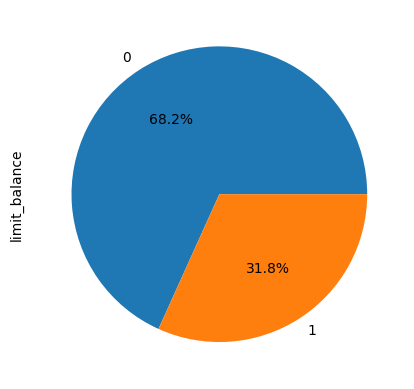

In [66]:
data = check.groupby("default_oct")["limit_balance"].count()
data.plot.pie(autopct="%.1f%%")

We can see that even that they have bills that breach their balance limit, most of this users tend to still pay their monthly bills.

## Repayment Features

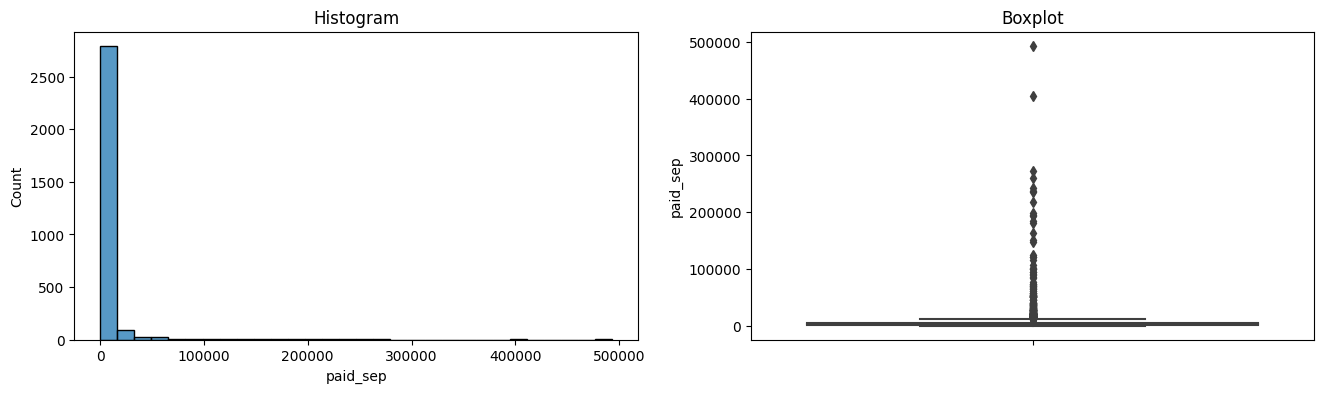


Skewness Value :  11.8664130009962


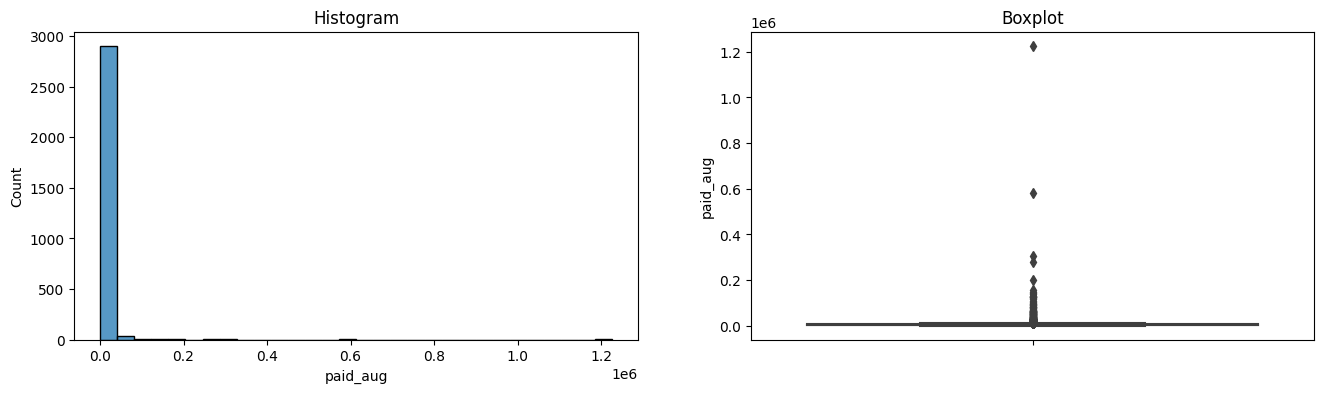


Skewness Value :  29.377027414679986


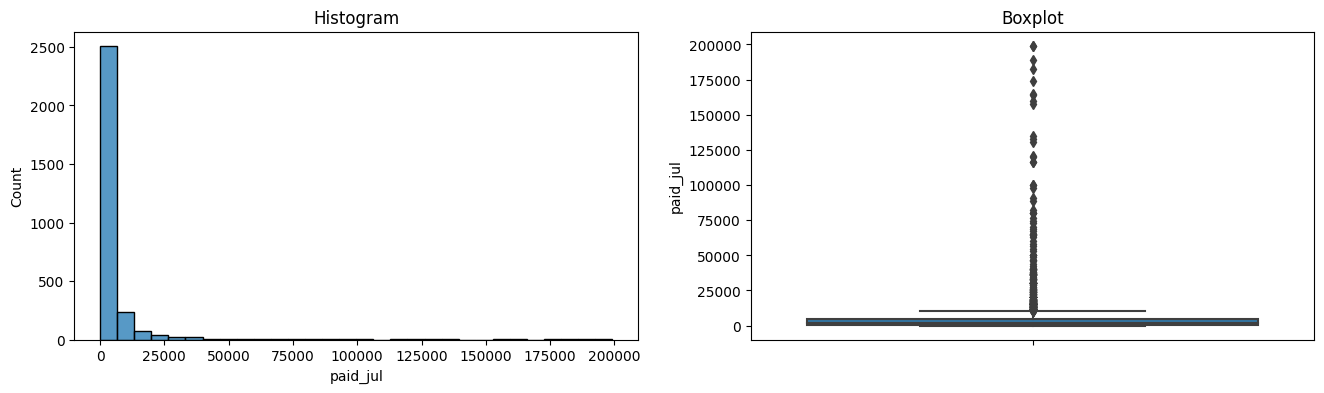


Skewness Value :  8.05230104851504


In [67]:
diagnostic_plots(df, 'paid_sep')
diagnostic_plots(df, 'paid_aug')
diagnostic_plots(df, 'paid_jul')

From the three different months, we see a similar distribution, a highly skewed distribution because the majority of the data lies within the small if not 0 values, therefore it is not reccommended to handle the outliers because it may contain valuable data for our model which is the user with high uses of their credit cards.

## Limit Balance Feature

The last feature is the limit_balance feature which indicates the credit limit of our user.

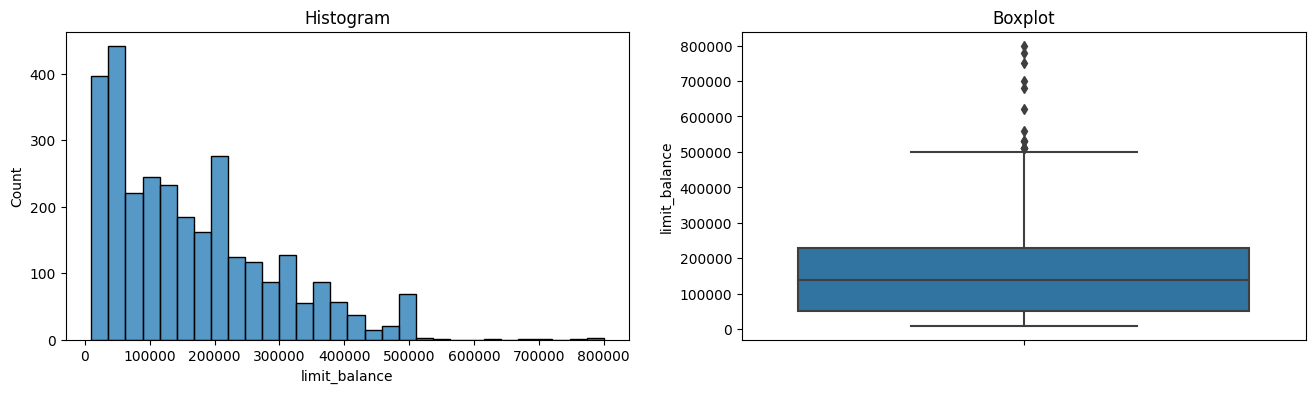


Skewness Value :  0.999350012877957


In [68]:
diagnostic_plots(df, 'limit_balance')

We can see that it has a skewed distribution, therefore we will check the outliers using IQR method.

In [69]:
upper_boundary, lower_boundary = find_skewed_boundaries(df, 'limit_balance', 3)
upper_boundary, lower_boundary

(770000.0, -490000.0)

In [70]:
outlier = df[df['limit_balance']>upper_boundary]
outlier.sort_values('limit_balance')

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
36,780000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
544,800000.0,1,2,1,53.0,-1.0,-1.0,-1.0,0.0,0,...,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0


We can see that there are only 2 outliers here, and the value doesn't differ to much against the boundary, therefore we can assume these outliers are natural.

Let's compare this data with our target by using density for it's distribution.

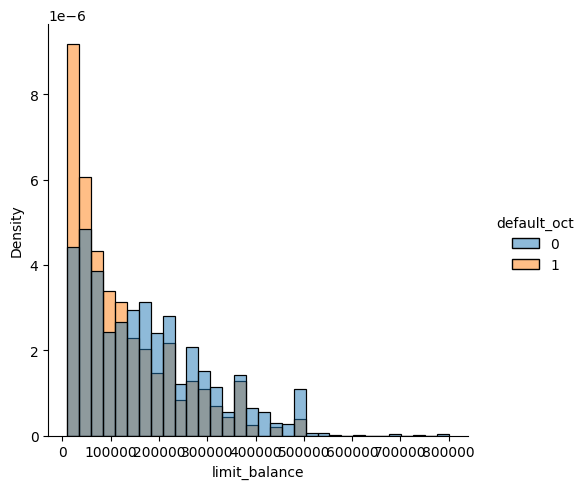

In [71]:
sns.displot(df, x="limit_balance", hue="default_oct", stat='density', common_norm=False)

We can see that that the user with lower limit balance is more likely to default payment by looking at the density of our data distribution. We will investigate this further in feature selection.

## Default Payment

Lastly we got our target, which is default_oct, we'll check all the category for this column.

In [72]:
plot_bar('default_oct')

   default_oct  counts
0            0    2324
1            1     635


There's only two options here, 0 for no the user won't default, and 1 for yes the user will default the payment. Now we will check the proportion of the 2 categoris.

In [73]:
no = df[df['default_oct'] == 0]
yes = df[df['default_oct'] == 1]
len(no)/len(df)*100, len(yes)/len(df)*100

(78.54004731328152, 21.459952686718488)

We can see that there are about 78,5% user who didn't default their payment while 21,5% default their payment this month, this also means that we need to split the data with equal proportion later because this target is imbalance.

# 5 - Data Preprocessing

## Get Data for Model Inference

The first thing to do in preprocessing is to split a little sample from our dataset for our model inference.

In [74]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=1)
data_inf

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
798,140000.0,2,2,2,29.0,0.0,0.0,0.0,0.0,0,...,131374.0,135353.0,137238.0,7001.0,4700.0,4706.0,6100.0,5300.0,4806.0,0
1072,560000.0,2,1,2,32.0,0.0,0.0,0.0,0.0,0,...,15488.0,12579.0,11400.0,1548.0,1446.0,14720.0,427.0,1000.0,300.0,0
1217,220000.0,1,1,2,37.0,2.0,2.0,0.0,0.0,0,...,188465.0,192758.0,196493.0,0.0,9000.0,7000.0,7500.0,7100.0,7500.0,0
1527,50000.0,2,2,2,30.0,-1.0,-1.0,-1.0,-1.0,-1,...,1190.0,543.0,920.0,2859.0,1452.0,1190.0,543.0,920.0,534.0,0
1613,20000.0,1,2,1,37.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,17666.0,2000.0,19400.0,0.0,0.0,17666.0,0.0,1
100,290000.0,1,2,1,46.0,0.0,0.0,0.0,0.0,0,...,133147.0,135147.0,127087.0,7800.0,7839.0,4706.0,5400.0,4604.0,4900.0,0
1684,450000.0,1,1,1,43.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
257,50000.0,1,2,1,32.0,0.0,0.0,0.0,0.0,0,...,23584.0,17272.0,17634.0,1472.0,1500.0,1282.0,618.0,640.0,644.0,0
194,310000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0,...,62473.0,69837.0,69898.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0,0
1219,30000.0,2,1,2,36.0,1.0,2.0,0.0,0.0,0,...,26578.0,27133.0,27783.0,0.0,1433.0,951.0,983.0,1099.0,750.0,1


After we split the data we will remove those data from our dataset.

In [75]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)

# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

data_train_test


,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
3,140000.0,2,2,1,34.0,0.0,0.0,0.0,0.0,0,...,140962.0,137819.0,137094.0,7000.0,7000.0,5300.0,5300.0,10100.0,5400.0,0
4,20000.0,2,2,1,49.0,0.0,0.0,0.0,0.0,0,...,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2945,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2946,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2947,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0


## Splitting between Train-Set and Test-Set

Next we will split our data into train-set and test-set, we will use ratio of 80:20 to split them and also use stratify on our target to keep the split proportion equal between the target categories.

In [76]:
# Splitting between Train-Set and Test-Set
train, test= train_test_split(data_train_test, test_size=0.2, random_state=1, stratify = data_train_test['default_oct'])

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)

Train Size :  (2359, 24)
Test Size  :  (590, 24)


## Handling Missing Values

From our early exploration we didn't find any missing values, but we will do another check just to be sure.

In [77]:
train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
status_sep         0
status_aug         0
status_jul         0
status_jun         0
status_may         0
status_apr         0
bill_sep           0
bill_aug           0
bill_jul           0
bill_jun           0
bill_may           0
bill_apr           0
paid_sep           0
paid_aug           0
paid_jul           0
paid_jun           0
paid_may           0
paid_apr           0
default_oct        0
dtype: int64

In [78]:
test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
status_sep         0
status_aug         0
status_jul         0
status_jun         0
status_may         0
status_apr         0
bill_sep           0
bill_aug           0
bill_jul           0
bill_jun           0
bill_may           0
bill_apr           0
paid_sep           0
paid_aug           0
paid_jul           0
paid_jun           0
paid_may           0
paid_apr           0
default_oct        0
dtype: int64

## Feature Selection

In [79]:
# Display X_train

train

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
1958,40000.0,2,3,2,55.0,1.0,2.0,2.0,2.0,2,...,30561.0,29770.0,31666.0,2000.0,0.0,3000.0,0.0,2382.0,0.0,0
2466,100000.0,2,5,2,34.0,0.0,0.0,0.0,0.0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
2535,50000.0,1,2,1,41.0,-1.0,-1.0,-1.0,0.0,-1,...,390.0,390.0,390.0,390.0,780.0,0.0,390.0,390.0,1170.0,1
1727,180000.0,2,2,1,32.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,1
954,320000.0,1,1,2,36.0,0.0,0.0,0.0,0.0,0,...,84218.0,76058.0,24068.0,5465.0,3137.0,52.0,2384.0,25094.0,30011.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,30000.0,2,2,2,22.0,1.0,2.0,0.0,0.0,0,...,7150.0,6508.0,8459.0,1500.0,1396.0,2000.0,178.0,2000.0,2000.0,0
2728,290000.0,1,1,2,40.0,0.0,0.0,0.0,0.0,0,...,131933.0,135606.0,132906.0,8000.0,10000.0,5000.0,6000.0,4700.0,5000.0,0
1403,30000.0,2,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,2462.0,3605.0,1559.0,1270.0,11500.0,2462.0,1559.0,0.0,3192.0,0
947,90000.0,1,2,2,52.0,0.0,0.0,0.0,0.0,0,...,88735.0,87521.0,85699.0,3505.0,3962.0,2909.0,3107.0,3127.0,3032.0,0


From our EDA we conclude that we won't use all the status features because the data are inconsistent, so we will remove it later.

Now we will do feature selection based on the correlation with our target which is default_oct, starting with our numerical features. We will use ANOVA to find the p-value.

In [80]:
model = ols('bill_sep ~ default_oct', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
default_oct,1.0,1.246553e+08,1.246553e+08,0.023444,0.87832
Residual,2357.0,1.253235e+13,5.317075e+09,NaN,NaN


In [81]:
model = ols('paid_sep ~ default_oct', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
default_oct,1.0,5.599024e+09,5.599024e+09,11.120246,0.000867
Residual,2357.0,1.186745e+12,5.034982e+08,NaN,NaN


We can see that the p-value (PR>F) for bill_sep is above alpha (0.05) while paid_sep is below it, therefore we can say that the feature that have  correlation with our target is paid_sep, this actually make sense because it terms of determining wether the user default the payment or not, it doesn't matter how big or small the bills are, it only matters how much the user paid for the bills if not at all.

In [82]:
model = ols('limit_balance ~ default_oct', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
default_oct,1.0,1.027426e+12,1.027426e+12,66.376228,5.976051e-16
Residual,2357.0,3.648358e+13,1.547882e+10,NaN,NaN


In [83]:
model = ols('age ~ default_oct', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
default_oct,1.0,80.041463,80.041463,0.978382,0.3227
Residual,2357.0,192826.265447,81.810040,NaN,NaN


For our next two features we can see that age doen't have correlation with our target, but the limit_balance does have a strong correlation, we can assume that user with high credit limit is wealthier and therefore could pay their bills regularly.

Next are our categorical features, which we will check with chi square test.

In [84]:
columns = ['sex', 'education_level', 'marital_status']

chi2_check = []
for i in columns:
    if chi2_contingency(pd.crosstab(df['default_oct'], df[i]))[1] < 0.05:
        chi2_check.append('There are correlation')
    else:
        chi2_check.append('There are no correlation')

res = pd.DataFrame(data=
[columns, chi2_check]).T
res.columns = ['Column', 'Correlation']
print(res)

            Column               Correlation
0              sex  There are no correlation
1  education_level     There are correlation
2   marital_status  There are no correlation


From this test we can conclude that only education_level have correlation with our target, we can assume that the user with higher education have better jobs and income to pay the bills regularly. Now we will drop the features that we won't use in our model.

In [85]:
# Drop Column

train = train.drop(train.iloc[:, 3:17],axis = 1)
test = test.drop(test.iloc[:, 3:17],axis = 1)
train.drop(['sex'], axis=1, inplace=True)
test.drop(['sex'], axis=1, inplace=True)
train

,limit_balance,education_level,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
1958,40000.0,3,2000.0,0.0,3000.0,0.0,2382.0,0.0,0
2466,100000.0,5,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
2535,50000.0,2,390.0,780.0,0.0,390.0,390.0,1170.0,1
1727,180000.0,2,0.0,0.0,0.0,0.0,0.0,800.0,1
954,320000.0,1,5465.0,3137.0,52.0,2384.0,25094.0,30011.0,0
...,...,...,...,...,...,...,...,...,...
1204,30000.0,2,1500.0,1396.0,2000.0,178.0,2000.0,2000.0,0
2728,290000.0,1,8000.0,10000.0,5000.0,6000.0,4700.0,5000.0,0
1403,30000.0,1,1270.0,11500.0,2462.0,1559.0,0.0,3192.0,0
947,90000.0,2,3505.0,3962.0,2909.0,3107.0,3127.0,3032.0,0


## Splitting between Features and Target

After we select all our features, we will do splitting between those features and our target.

In [86]:
# Splitting between `X` and `y`

X_train = train.drop(['default_oct'], axis=1)
X_test = test.drop(['default_oct'], axis=1)
y_train = train['default_oct']
y_test = test['default_oct']
X_train

,limit_balance,education_level,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr
1958,40000.0,3,2000.0,0.0,3000.0,0.0,2382.0,0.0
2466,100000.0,5,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0
2535,50000.0,2,390.0,780.0,0.0,390.0,390.0,1170.0
1727,180000.0,2,0.0,0.0,0.0,0.0,0.0,800.0
954,320000.0,1,5465.0,3137.0,52.0,2384.0,25094.0,30011.0
...,...,...,...,...,...,...,...,...
1204,30000.0,2,1500.0,1396.0,2000.0,178.0,2000.0,2000.0
2728,290000.0,1,8000.0,10000.0,5000.0,6000.0,4700.0,5000.0
1403,30000.0,1,1270.0,11500.0,2462.0,1559.0,0.0,3192.0
947,90000.0,2,3505.0,3962.0,2909.0,3107.0,3127.0,3032.0


In [87]:
# Get Numerical Columns and Categorical Columns

num_columns = ['limit_balance', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr']
cat_columns = ['education_level']

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr']
Categorical Columns :  ['education_level']


In [88]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr
1958,40000.0,2000.0,0.0,3000.0,0.0,2382.0,0.0
2466,100000.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0
2535,50000.0,390.0,780.0,0.0,390.0,390.0,1170.0
1727,180000.0,0.0,0.0,0.0,0.0,0.0,800.0
954,320000.0,5465.0,3137.0,52.0,2384.0,25094.0,30011.0
...,...,...,...,...,...,...,...
1204,30000.0,1500.0,1396.0,2000.0,178.0,2000.0,2000.0
2728,290000.0,8000.0,10000.0,5000.0,6000.0,4700.0,5000.0
1403,30000.0,1270.0,11500.0,2462.0,1559.0,0.0,3192.0
947,90000.0,3505.0,3962.0,2909.0,3107.0,3127.0,3032.0


## Feature Scaling

In [89]:
# Display X_train

X_train_num

,limit_balance,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr
1958,40000.0,2000.0,0.0,3000.0,0.0,2382.0,0.0
2466,100000.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0
2535,50000.0,390.0,780.0,0.0,390.0,390.0,1170.0
1727,180000.0,0.0,0.0,0.0,0.0,0.0,800.0
954,320000.0,5465.0,3137.0,52.0,2384.0,25094.0,30011.0
...,...,...,...,...,...,...,...
1204,30000.0,1500.0,1396.0,2000.0,178.0,2000.0,2000.0
2728,290000.0,8000.0,10000.0,5000.0,6000.0,4700.0,5000.0
1403,30000.0,1270.0,11500.0,2462.0,1559.0,0.0,3192.0
947,90000.0,3505.0,3962.0,2909.0,3107.0,3127.0,3032.0


From our EDA we now that these feature have a skewed distribution, so we will use minmaxscaler to standardize the data.

In [90]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.03896104, 0.00405385, 0.        , ..., 0.        , 0.00613805,
        0.        ],
       [0.11688312, 0.01014274, 0.00310574, ..., 0.01979453, 0.00829487,
        0.0081647 ],
       [0.05194805, 0.0007905 , 0.00063565, ..., 0.00192997, 0.00100497,
        0.00512484],
       ...,
       [0.02597403, 0.0025742 , 0.00937183, ..., 0.00771492, 0.        ,
        0.0139816 ],
       [0.1038961 , 0.00710437, 0.0032288 , ..., 0.0153754 , 0.0080578 ,
        0.01328077],
       [0.4025974 , 0.00625104, 0.00245053, ..., 0.01171341, 0.00631328,
        0.01065265]])

## Feature Encoding

In [91]:
# Display X_train

X_train_cat

,education_level
1958,3
2466,5
2535,2
1727,2
954,1
...,...
1204,2
2728,1
1403,1
947,2


Our categorical feature is already in numeric form so we don't need encoding, we will just turn this data to array.

In [92]:
X_train_cat_encoded = X_train_cat.to_numpy()
X_test_cat_encoded = X_test_cat.to_numpy()
X_train_cat_encoded

array([[3],
       [5],
       [2],
       ...,
       [1],
       [2],
       [3]], dtype=int64)

## Concate the Feature Columns

After processing all the features, we will concate all of them into one final dataset.

In [93]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7
0,0.038961,0.004054,0.000000,0.015060,0.000000,0.006138,0.000000,3.0
1,0.116883,0.010143,0.003106,0.015070,0.019795,0.008295,0.008165,5.0
2,0.051948,0.000791,0.000636,0.000000,0.001930,0.001005,0.005125,2.0
3,0.220779,0.000000,0.000000,0.000000,0.000000,0.000000,0.003504,2.0
4,0.402597,0.011077,0.002556,0.000261,0.011798,0.064663,0.131454,1.0
...,...,...,...,...,...,...,...,...
2354,0.025974,0.003040,0.001138,0.010040,0.000881,0.005154,0.008760,2.0
2355,0.363636,0.016215,0.008149,0.025099,0.029692,0.012111,0.021901,1.0
2356,0.025974,0.002574,0.009372,0.012359,0.007715,0.000000,0.013982,1.0
2357,0.103896,0.007104,0.003229,0.014603,0.015375,0.008058,0.013281,2.0


# 6 - Model Definition

We will use 7 models:
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. Adaboost

We will use cross_val_score to fine the best performing model by looking at the mean and std from the model's F1 score because although the recall of true positive is more important, we also need to minimalize the bad precision.

After we got the best default model, we will use gridsearch to define a better parameter combination which we will decide based on the chosen model later.

In [94]:
# Logistic Regression model

lr = LogisticRegression(max_iter=500)

In [95]:
# SVM Classifier model
svm = SVC()

In [96]:
# Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=1)

In [97]:
# Random Forest Classifier model
rf = RandomForestClassifier(random_state=1)

In [98]:
# KNN Classifier model
knn = KNeighborsClassifier()

In [99]:
# Naive Bayes model
nb = GaussianNB()

In [100]:
# Adaboost model
ab = AdaBoostClassifier()

# 7 - Model Training

Now we will train each models with the basic parameters.

In [101]:
lr.fit(X_train_final, y_train)

LogisticRegression(max_iter=500)

In [102]:
svm.fit(X_train_final, y_train)

SVC()

In [103]:
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=1)

In [104]:
rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=1)

In [105]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

In [106]:
nb.fit(X_train_final, y_train)

GaussianNB()

In [107]:
ab.fit(X_train_final, y_train)

AdaBoostClassifier()

# 8 - Model Evaluation

## Cross Validation

We will use cross validation to check each models by their F1 scores.

In [128]:
sk=StratifiedKFold()

cv_lr = cross_val_score(lr, X_train, y_train, cv=sk, scoring="f1")
cv_svm = cross_val_score(svm, X_train, y_train, cv=sk, scoring="f1")
cv_dt = cross_val_score(dt, X_train, y_train, cv=sk, scoring="f1")
cv_rf = cross_val_score(rf, X_train, y_train, cv=sk, scoring="f1")
cv_knn = cross_val_score(knn, X_train, y_train, cv=sk, scoring="f1")
cv_nb = cross_val_score(nb, X_train, y_train, cv=sk, scoring="f1")
cv_ab = cross_val_score(ab, X_train, y_train, cv=sk, scoring="f1")
name = []
cv_scores=0
for cv,name in zip([cv_lr,cv_svm,cv_dt,cv_rf,cv_knn,cv_nb,cv_ab],['lr','svm','dt','rf','knn','nb','ab']):
    print(name)
    print('f1 - Mean - Cross Validation : ', cv)
    print('f1 - Mean - Cross Validation : ', cv.mean())
    print('f1 - Std - Cross Validation  : ', cv.std())
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        best_name = name
    else:
        pass
print('best:', best_name)
print('cross-val mean:', cv_scores)

lr
f1 - Mean - Cross Validation :  [0. 0. 0. 0. 0.]
f1 - Mean - Cross Validation :  0.0
f1 - Std - Cross Validation  :  0.0
svm
f1 - Mean - Cross Validation :  [0. 0. 0. 0. 0.]
f1 - Mean - Cross Validation :  0.0
f1 - Std - Cross Validation  :  0.0
dt
f1 - Mean - Cross Validation :  [0.26008969 0.32692308 0.31       0.28318584 0.26976744]
f1 - Mean - Cross Validation :  0.2899932091180323
f1 - Std - Cross Validation  :  0.024954877007474785
rf
f1 - Mean - Cross Validation :  [0.1322314  0.18461538 0.26153846 0.17777778 0.11111111]
f1 - Mean - Cross Validation :  0.17345482800028256
f1 - Std - Cross Validation  :  0.05193858307433913
knn
f1 - Mean - Cross Validation :  [0.26666667 0.22068966 0.25165563 0.24489796 0.20547945]
f1 - Mean - Cross Validation :  0.23787787244332428
f1 - Std - Cross Validation  :  0.021968137503517005
nb
f1 - Mean - Cross Validation :  [0.39759036 0.3628866  0.38477801 0.37959184 0.37924152]
f1 - Mean - Cross Validation :  0.3808176651539358
f1 - Std - Cross V

From cross validating the F1 score we see that the Naive Bayes model have a better performance than the other models, we will evaluate this model further with decision matrix.

## Train-set Prediction

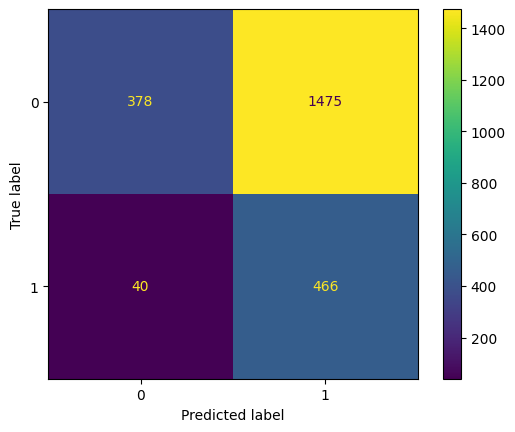

Decision Tree
               precision    recall  f1-score   support

           0       0.90      0.20      0.33      1853
           1       0.24      0.92      0.38       506

    accuracy                           0.36      2359
   macro avg       0.57      0.56      0.36      2359
weighted avg       0.76      0.36      0.34      2359



In [129]:
y_pred_train = cross_val_predict(nb, X_train, y_train, cv=sk)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)

disp.plot()
plt.show()
print("Decision Tree\n", classification_report(y_train, y_pred_train))

We can see that the model have a good recall performance for the true positive, but the precision is bad, that's why the f1 score for positive value is only 0.38.

## Test-set Prediction

Now let's use the Naive Bayes model to predict our test-set.

In [112]:
# Predict Test-Set 

y_pred_test = nb.predict(X_test_final)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

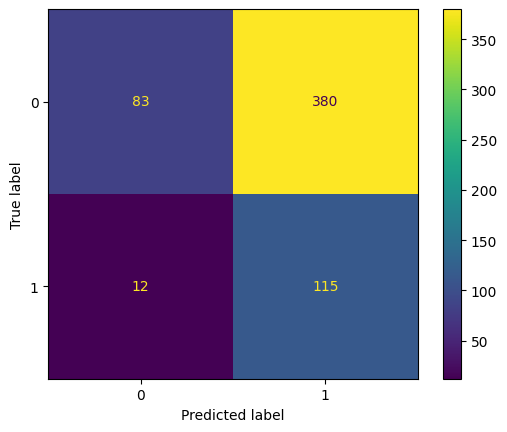

Decision Tree
               precision    recall  f1-score   support

           0       0.87      0.18      0.30       463
           1       0.23      0.91      0.37       127

    accuracy                           0.34       590
   macro avg       0.55      0.54      0.33       590
weighted avg       0.74      0.34      0.31       590



In [113]:
cm = confusion_matrix(y_test, y_pred_test, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)

disp.plot()
plt.show()
print("Decision Tree\n", classification_report(y_test, y_pred_test))

We can see a very similar performance between the two prediction which indicate that this model is underfit.

## Model Improvement

Let's try to improve the model performance using gridsearch, for Naive Bayes we will tune the var_smoothing hyperparameter to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean according to this <a href="https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba">source</a>.

In [121]:
# Define Hyperparameters
vs = np.logspace(0,-9, num=100)

# Define Random search
param = dict(var_smoothing=vs)
grid_search = GridSearchCV  (estimator=nb, 
                            param_grid=param,
                            n_jobs=-1, 
                            scoring='recall')
grid_result = grid_search.fit(X_train_final_df, y_train)


# Show Best Parameters
grid_search.best_params_

{'var_smoothing': 0.0002310129700083158}

In [132]:
best_nb = grid_search.best_estimator_

y_pred_train2 = best_nb.predict(X_train_final)
y_pred_test2 = best_nb.predict(X_test_final)

y_pred_train2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

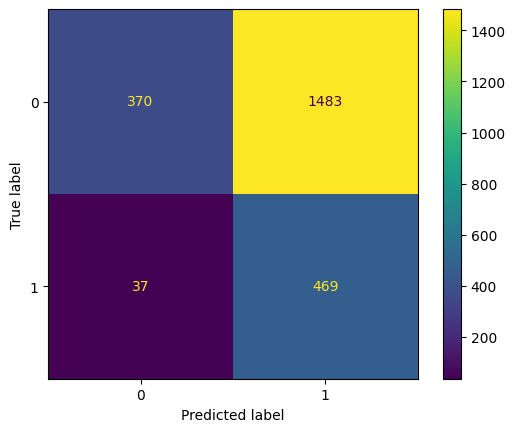

              precision    recall  f1-score   support

           0       0.91      0.20      0.33      1853
           1       0.24      0.93      0.38       506

    accuracy                           0.36      2359
   macro avg       0.57      0.56      0.35      2359
weighted avg       0.77      0.36      0.34      2359



In [133]:
cm = confusion_matrix(y_train, y_pred_train2, labels=best_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_nb.classes_)

disp.plot()
plt.show()

print(classification_report(y_train,y_pred_train2))

Compared to the initial model, this new model is quite different, the true positive went down from 466 to 368, but the true negative went up significantly which is from 378 to 856. Which make this model to have higher f1 score and accuracy than the original model. But the recall for the positive value went down from 0.92 to 0.73, so that has to be a consideration.

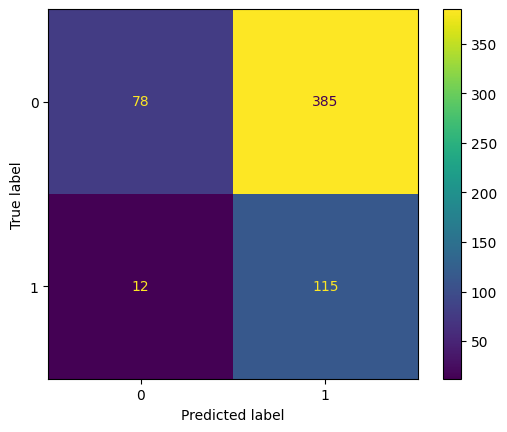

              precision    recall  f1-score   support

           0       0.87      0.17      0.28       463
           1       0.23      0.91      0.37       127

    accuracy                           0.33       590
   macro avg       0.55      0.54      0.32       590
weighted avg       0.73      0.33      0.30       590



In [134]:
cm = confusion_matrix(y_test, y_pred_test2, labels=best_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_nb.classes_)

disp.plot()
plt.show()

print(classification_report(y_test,y_pred_test2))

Similar with the train-set, we also see improvement in f1 score and accuracy here, but the recall for positive value also went down from 0.91 to 0.72.

## Determining the Final Model

After making some tuning to improve the model, it seems that the performance from the new model is better in terms of f1 score and accuracy, but the recall score is going down, we can use ROC-AUC score to determine which model we will use.

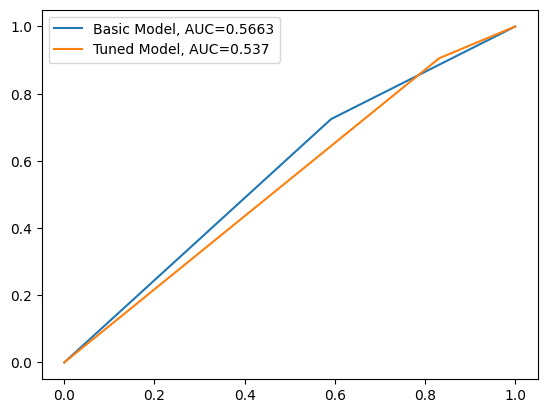

In [140]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr,tpr,label="Basic Model, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test2)
auc = round(roc_auc_score(y_test, y_pred_test2), 4)
plt.plot(fpr,tpr,label="Tuned Model, AUC="+str(auc))

#add legend
plt.legend()

We can see that the basic model is closer to 1 than the other model, so we will use the basic Naive Bayes model.

## Model Saving

Now we will save the model so we can use it again later.

In [141]:
# Save the Files

with open('nb.pkl', 'wb') as file_1:
  joblib.dump(nb, file_1)

with open('scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('num_columns.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('cat_columns.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)

# 9 - Model Inference

Now we will use our preferred model to predict a new dataset which is our inference data that we already split from the start, first we will load the model from the saved files.

In [143]:
# Load All Files

with open('nb.pkl', 'rb') as file_1:
  nb = joblib.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = joblib.load(file_2)

with open('num_columns.txt', 'r') as file_3:
  num_columns = json.load(file_3)

with open('cat_columns.txt', 'r') as file_4:
  cat_columns = json.load(file_4)

Let's take a look of our inference data.

In [144]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,140000.0,2,2,2,29.0,0.0,0.0,0.0,0.0,0,...,131374.0,135353.0,137238.0,7001.0,4700.0,4706.0,6100.0,5300.0,4806.0,0
1,560000.0,2,1,2,32.0,0.0,0.0,0.0,0.0,0,...,15488.0,12579.0,11400.0,1548.0,1446.0,14720.0,427.0,1000.0,300.0,0
2,220000.0,1,1,2,37.0,2.0,2.0,0.0,0.0,0,...,188465.0,192758.0,196493.0,0.0,9000.0,7000.0,7500.0,7100.0,7500.0,0
3,50000.0,2,2,2,30.0,-1.0,-1.0,-1.0,-1.0,-1,...,1190.0,543.0,920.0,2859.0,1452.0,1190.0,543.0,920.0,534.0,0
4,20000.0,1,2,1,37.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,17666.0,2000.0,19400.0,0.0,0.0,17666.0,0.0,1
5,290000.0,1,2,1,46.0,0.0,0.0,0.0,0.0,0,...,133147.0,135147.0,127087.0,7800.0,7839.0,4706.0,5400.0,4604.0,4900.0,0
6,450000.0,1,1,1,43.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,50000.0,1,2,1,32.0,0.0,0.0,0.0,0.0,0,...,23584.0,17272.0,17634.0,1472.0,1500.0,1282.0,618.0,640.0,644.0,0
8,310000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0,...,62473.0,69837.0,69898.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0,0
9,30000.0,2,1,2,36.0,1.0,2.0,0.0,0.0,0,...,26578.0,27133.0,27783.0,0.0,1433.0,951.0,983.0,1099.0,750.0,1


Now we will split the data based on the types of categories.

In [145]:
# Split the features

inf_num = data_inf[num_columns]
inf_cat = data_inf[cat_columns]

inf_num

,limit_balance,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr
0,140000.0,7001.0,4700.0,4706.0,6100.0,5300.0,4806.0
1,560000.0,1548.0,1446.0,14720.0,427.0,1000.0,300.0
2,220000.0,0.0,9000.0,7000.0,7500.0,7100.0,7500.0
3,50000.0,2859.0,1452.0,1190.0,543.0,920.0,534.0
4,20000.0,2000.0,19400.0,0.0,0.0,17666.0,0.0
5,290000.0,7800.0,7839.0,4706.0,5400.0,4604.0,4900.0
6,450000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,50000.0,1472.0,1500.0,1282.0,618.0,640.0,644.0
8,310000.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0
9,30000.0,0.0,1433.0,951.0,983.0,1099.0,750.0


Now we will transform the data accordingly.

In [146]:
inf_scaled = scaler.transform(inf_num)
inf_encoded = inf_cat.to_numpy()

data_inf_final = np.concatenate([inf_scaled, inf_encoded], axis=1)
data_inf_final

array([[1.68831169e-01, 1.41905067e-02, 3.83022487e-03, 2.36234307e-02,
        3.01866624e-02, 1.36572947e-02, 2.10512484e-02, 2.00000000e+00],
       [7.14285714e-01, 3.13768095e-03, 1.17840536e-03, 7.38922438e-02,
        2.11306637e-03, 2.57684805e-03, 1.31406045e-03, 1.00000000e+00],
       [2.72727273e-01, 0.00000000e+00, 7.33447316e-03, 3.51389746e-02,
        3.71147489e-02, 1.82956212e-02, 3.28515112e-02, 1.00000000e+00],
       [5.19480519e-02, 5.79498052e-03, 1.18329500e-03, 5.97362569e-03,
        2.68710782e-03, 2.37070021e-03, 2.33902760e-03, 2.00000000e+00],
       [1.29870130e-02, 4.05385136e-03, 1.58098644e-02, 0.00000000e+00,
        0.00000000e+00, 4.55225977e-02, 0.00000000e+00, 2.00000000e+00],
       [3.63636364e-01, 1.58100203e-02, 6.38832613e-03, 2.36234307e-02,
        2.67226192e-02, 1.18638084e-02, 2.14629873e-02, 2.00000000e+00],
       [5.71428571e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.

After encoding complete we can run our model to predict the results.

In [147]:
# Predict using Linear regression

y_pred_inf = nb.predict(data_inf_final)
y_pred_inf

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

And finally we can add the results to our inference dataset.

In [148]:
data_inf['default_oct'] = y_pred_inf
data_inf

,limit_balance,sex,education_level,marital_status,age,status_sep,status_aug,status_jul,status_jun,status_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default_oct
0,140000.0,2,2,2,29.0,0.0,0.0,0.0,0.0,0,...,131374.0,135353.0,137238.0,7001.0,4700.0,4706.0,6100.0,5300.0,4806.0,1
1,560000.0,2,1,2,32.0,0.0,0.0,0.0,0.0,0,...,15488.0,12579.0,11400.0,1548.0,1446.0,14720.0,427.0,1000.0,300.0,0
2,220000.0,1,1,2,37.0,2.0,2.0,0.0,0.0,0,...,188465.0,192758.0,196493.0,0.0,9000.0,7000.0,7500.0,7100.0,7500.0,1
3,50000.0,2,2,2,30.0,-1.0,-1.0,-1.0,-1.0,-1,...,1190.0,543.0,920.0,2859.0,1452.0,1190.0,543.0,920.0,534.0,1
4,20000.0,1,2,1,37.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,17666.0,2000.0,19400.0,0.0,0.0,17666.0,0.0,0
5,290000.0,1,2,1,46.0,0.0,0.0,0.0,0.0,0,...,133147.0,135147.0,127087.0,7800.0,7839.0,4706.0,5400.0,4604.0,4900.0,1
6,450000.0,1,1,1,43.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,50000.0,1,2,1,32.0,0.0,0.0,0.0,0.0,0,...,23584.0,17272.0,17634.0,1472.0,1500.0,1282.0,618.0,640.0,644.0,1
8,310000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0,...,62473.0,69837.0,69898.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0,0
9,30000.0,2,1,2,36.0,1.0,2.0,0.0,0.0,0,...,26578.0,27133.0,27783.0,0.0,1433.0,951.0,983.0,1099.0,750.0,1


# 10 - Conclusion

## Conceptual Problems

### 1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Criterion pada decision tree adalah suatu tolak ukur yang menunjukkan tingkat variasi antar split, contohnya pada criterion gini semakin kecil nilai gini pada suatu split maka semakin kecil pula tingkat variasi pada split tersebut apabila gini bernilai 0, maka pada split itu hanya terdiri satu jenis kategori saja atau biasa disebut pure.

<a href="https://quantdare.com/decision-trees-gini-vs-entropy/">Source</a>

### 2. Apakah fungsi dari pruning pada Tree model?

Pruning pada tree model dilakukan untuk mengurangi potensi overfitting dengan cara menyederhanakan tree model.

<a href="https://analyticsindiamag.com/what-is-pruning-in-tree-based-ml-models-and-why-is-it-done/">Source</a>

### 3. Bagaimana cara memilih K yang optimal pada KNN?

Tidak ada metode definitif untuk memilih k yang optimal pada knn, sehingga perlu dilakukan trial and error.

### 4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross validation adalah suatu metode yang dilakukan untuk mengetahui performa model tanpa menggunakan test-set dengan cara melakukan partisi pada train-set sedemikian rupa dan melakukan evaluasi berdasarkan partisi-partisi tersebut, hal ini dilakukan untuk mencegah data kita leak karena pengulangan train ataupun test.

<a href="https://www.kode.id/courses/take/ftds1/pdfs/39753328-day-3-am-model-improvement">Source</a>

### 5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

- Accuracy : didapat dengan menghitung persentase dari prediksi yang tepat dibanding total data (TP + TN / TP+FP+TN+FN).
- Precision : didapat dengan menghitung persentase dari prediksi yang tepat dibanding seluruh prediksi pada salah satu kategori, contoh: (TP / TP+FP)
- Recall : didapat dengan menghitung persentase dari prediksi yang tepat dibanding seluruh data pada salah satu kategori, contoh: (TP / TP+FN)
- F1 Score : didapat dengan mengkombinasi hasil presisi dan recall dengan rumus: 2x (precision x recall) / (precision + recall).

<a href="https://www.kode.id/courses/take/ftds1/pdfs/26404257-day-5-am-model-evaluation">Source</a>

## Model Analysis

- The goal of the model is to predict wether user will default the payment in October or not.
- Based on the recall of the positive value, this model got a performance score of 0,92 for the train-set and 0,92 for the test-set, but the f1 score is only 0.38 and 0.37 respectively, which indicate that this model could detect the class well but included a large points of other class in it
- Based on the confusion matrix the model could predict with 36% accuracy for the train-set and 0,34% for the test-set which indicate that this model is underfit and improvement is needed if not changing the model altogether.
- Model improvement was done by doing gridsearch by tuning the var_smoothing parameter but to no avail.
- The model could be improved by adding or removing some features.
- It is very reccommended to try to improve the other models with gridsearch or randomsearch.
- Although having a slighly worst performance in ROC-AUC score, the tuned Naive Bayes model have better accuracy and f1 score than the original model.

## Overall Analysis

- Based on EDA, we gather some informations such as:
1. There are some data with incorrect input in education_level, and marital_status feature.
2. The status of repayment features contained a large number of inconsistencies that make the information not trustworthy.
3. There are some negative values in bills feature which we assume that it meant the user overpaid their bills.
4. There are 211 user with bills that breach their balance limit, but most of them didn't default their payment this month.
5. There are some user who haven't paid their bills for more than 3 months, some even reaching 8 months.  
6. User with the lower balance limit tend to default their payment more than the other users.
7. There are around 21,5% user who default their payment whis month.

- From preprocessing, we gather some information such as:
1. There are no outliers being handled and no missing values either in this dataset.
2. The feature with strong correlation are only the paid, limit_balance, and education_level features.
3. The numerical data was transformed using minmaxscaler and there are no encoding needed for the categorical data.